In [7]:
import os
import sys

In [8]:
# 把我們自己寫的模組的位置，加入到模組搜尋路徑之中，不然會有 import error
module_dir = os.path.join(os.path.dirname(os.getcwd()), 'modules')
if not module_dir in sys.path:
    sys.path.append(module_dir)

In [9]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
import crawler

In [10]:
# 讀取從指定日期之後的股價資訊
df = crawler.get_quotes("TSLA", datetime(2016,8,1))

## 畫出BBands

In [11]:
# bbands策略,N=20
df['20ma'] = pd.Series.rolling(df['Close'], window=20).mean()
df['std'] = pd.Series.rolling(df['Close'], window=20).std()
# 上軌=20ma+1.5sd ,中軌=20ma, 下軌=20ma-1.5sd
df['ubb'] = df['20ma'] + 1.5*df['std']
df['mbb'] = df['20ma']
df['lbb'] = df['20ma'] - 1.5*df['std']

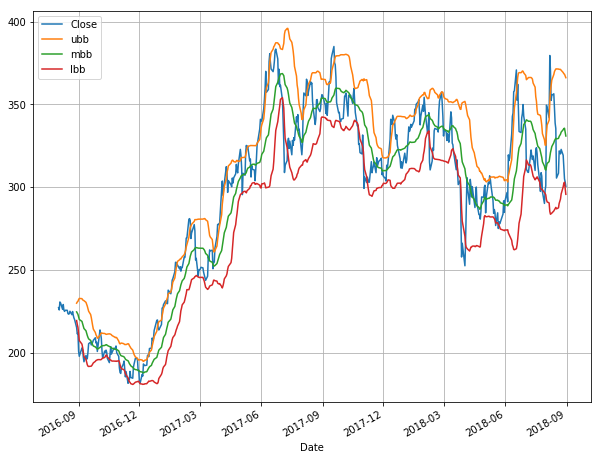

In [13]:
df[['Close','ubb','mbb', 'lbb']].plot(grid=True, figsize=(10,8))